In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from functions import *

""" 
•   x La proportion de victoire, défaite.
•	x Le nombre de tours moyen d’une partie.                     
•	x Le nombre moyen et/ou pourcentage de partie gagnée avec une pile de 4 animaux de sa propre couleur.             
•	x La proportion de couleur dans la pile finale pour chaque pion.
•	x Le nombre de fois en moyenne où la règle de la Retraite est appliquée.
•	x Le pourcentage de mouvement de chaque pièce au cours d’une partie.
•	x Le pourcentage d’occupation de chaque case du plateau pour chaque joueur.
•	x Le pourcentage de victoire pour chaque position de départ des 4 pions (identifier s'il y a une position de départ plus favorable).
"""

# Chargement du dataset qui contient les informations sur les parties jouées
url = "./dataset/game_M22_1.csv"
#url = "./dataset/game_20241126_120630.csv" #mon ajoute ksylia
df = pd.DataFrame(pd.read_csv(url))

# Lorsque que l'on écrit dans un csv les valeurs sont sérialisées en string donc il faut les désérialiser afin de les utiliser
# La fonction apply itère sur chaque ligne du dataframe et désérialise les valeurs
df["ai"] = df["ai"].apply(lambda x: eval(x))
df["final_stack"] = df["final_stack"].apply(lambda x: eval(x))
df["initial_pos"] = df["initial_pos"].apply(lambda x: eval(x))
df["donkey"] = df["donkey"].apply(lambda x: eval(x))
df["cat"] = df["cat"].apply(lambda x: eval(x))
df["dog"] = df["dog"].apply(lambda x: eval(x))
df["rooster"] = df["rooster"].apply(lambda x: eval(x))

# On récupère les informations sur les IA utilisées
ai = df["ai"][0]

In [2]:
# Information relative sur les AI / algorihtmes utilisés
ai_blue = df["ai"][0][0]
ai_orange = df["ai"][0][1]

print(get_ai_information(ai_blue))
print(get_ai_information(ai_orange))

AI BLUE: Minimax - depth: 4
AI ORANGE: Random


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ai           1 non-null      object
 1   victory      1 non-null      object
 2   turn         1 non-null      int64 
 3   retreat      1 non-null      int64 
 4   initial_pos  1 non-null      object
 5   final_stack  1 non-null      object
 6   donkey       1 non-null      object
 7   dog          1 non-null      object
 8   cat          1 non-null      object
 9   rooster      1 non-null      object
dtypes: int64(2), object(8)
memory usage: 212.0+ bytes


,turn,retreat
count,1.0,1.0
mean,189.0,2.0
std,NaN,NaN
min,189.0,2.0
25%,189.0,2.0
50%,189.0,2.0
75%,189.0,2.0
max,189.0,2.0


In [4]:
# Proportion de victoire et défaite pour chaque joueur
victory = df["victory"].value_counts()
print(victory / df["victory"].count() )
print("L'IA orange a gagné", victory[0], "parties et l'IA bleu a gagné", victory[1], "parties")

# Graphique de la proportion de victoire et défaite
plt.figure(figsize=(10, 5))
sns.barplot(x=victory.index, y=victory.values, palette=["orange", "blue"])
plt.title("Nombre de victoires selon le joueur")
plt.ylabel("Nombre de parties")
plt.xlabel("Joueur")
plt.show()

victory
ORANGE    1.0
Name: count, dtype: float64


C:\Users\Zord\AppData\Local\Temp\ipykernel_23520\3394823066.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("L'IA orange a gagné", victory[0], "parties et l'IA bleu a gagné", victory[1], "parties")


IndexError: index 1 is out of bounds for axis 0 with size 1

Nombre de tours moyen d'une partie: 135.56

Les parties qui se terminent le plus souvent en n tours:
Tour: 107, Occurrences: 8
Tour: 87, Occurrences: 8


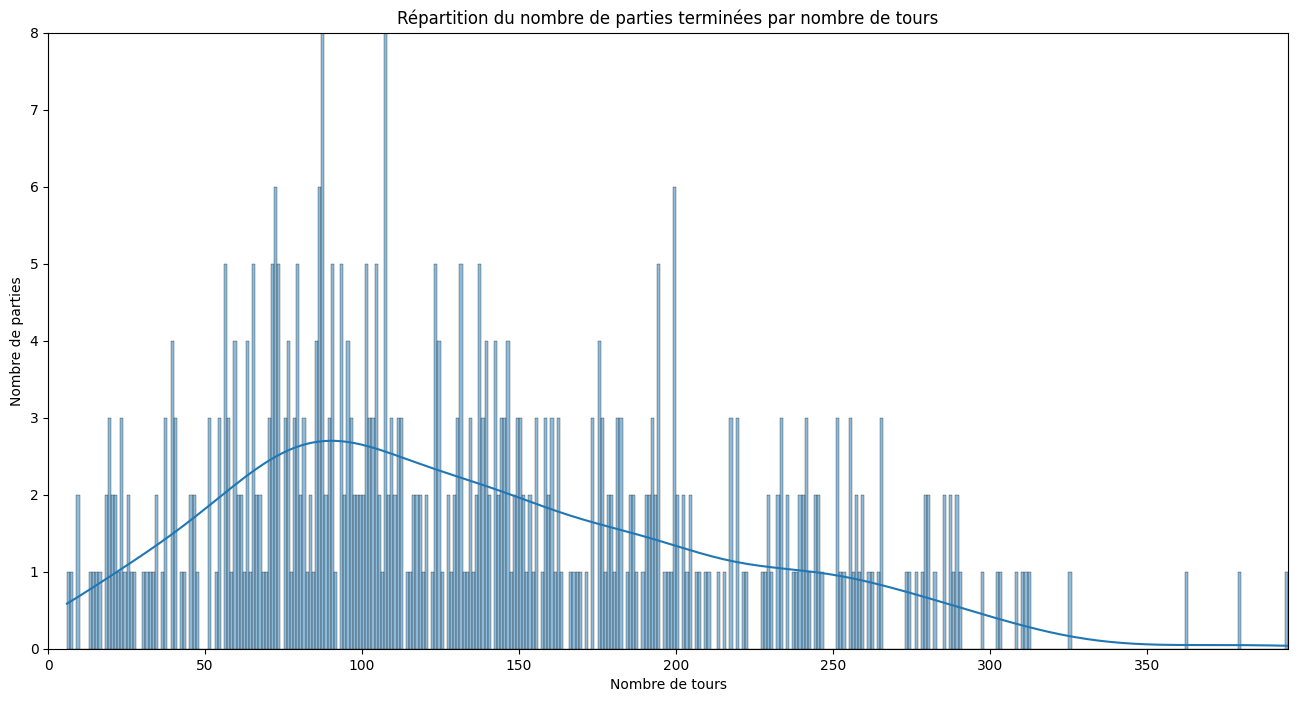

In [ ]:
#Nombre de tours moyen d'une partie
print(f"Nombre de tours moyen d'une partie: {df['turn'].mean():.2f}")

# value_count retourne le nombre d'occurrences de chaque valeur et max retourne la valeur la plus fréquente
# Combien de fois une partie se termine en n tours e.g 10 parties se sont terminées en 10 tours
occurrence = df["turn"].value_counts()
# Retourne un set qui donne le nombre de tours le plus fréquent
turn_occurrence_max = occurrence[occurrence == occurrence.max()]
print("\nLes parties qui se terminent le plus souvent en n tours:")
for turn, count in turn_occurrence_max.items():
    print(f"Tour: {turn}, Occurrences: {count}")
    
# Graphique du nombre de tours moyen d'une partie
plt.figure(figsize=(16, 8))
sns.histplot(df["turn"], bins=100, kde=True, binwidth=1)
plt.title("Répartition du nombre de parties terminées par nombre de tours")
plt.ylabel("Nombre de parties")
plt.xlabel("Nombre de tours")
plt.ylim(0, occurrence.max())
plt.xlim(4, df["turn"].max())
plt.yticks(np.arange(0, occurrence.max() + 1, 1))
plt.xticks(np.arange(0, df["turn"].max() + 1, 50))
plt.show()

Sur l'ensemble des piles finales:
270 piles finales sont composées de pions de couleur orange
214 piles finales sont composées de pions de couleur blue

Sur un total de 484 parties:
481 parties se terminent avec une pile de la même couleur
99.38% des parties se terminent avec une pile de la même couleur
0.62% des parties se terminent avec une pile de couleur différente


C:\Users\Zord\AppData\Local\Temp\ipykernel_30524\2743439075.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(color_occurrence[0], "piles finales sont composées de pions de couleur", color_occurrence.index[0])
C:\Users\Zord\AppData\Local\Temp\ipykernel_30524\2743439075.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(color_occurrence[1], "piles finales sont composées de pions de couleur", color_occurrence.index[1])


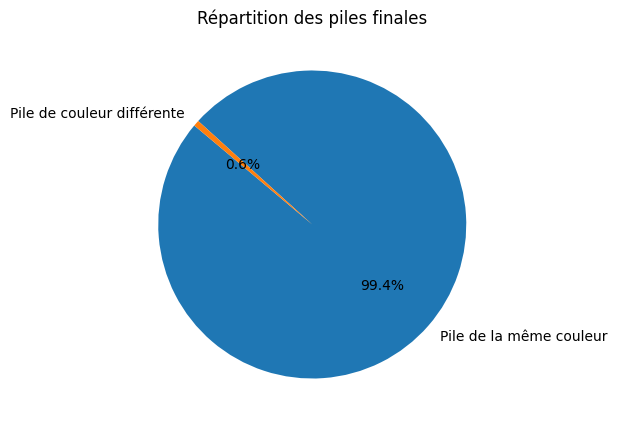

In [ ]:
# Pourcentage de parties terminées avec une pile de 4 animaux de la même couleur
color_occurrence = df["final_stack"].apply(lambda x: x[0]["color"]).value_counts()

print("Sur l'ensemble des piles finales:")
print(color_occurrence[0], "piles finales sont composées de pions de couleur", color_occurrence.index[0])
print(color_occurrence[1], "piles finales sont composées de pions de couleur", color_occurrence.index[1])

final_stack_of_the_same_color = df["final_stack"].apply(lambda row: count_stack_by_color(row)).value_counts()

print(f"\nSur un total de {final_stack_of_the_same_color.sum()} parties:")
print(f"{final_stack_of_the_same_color[True]} parties se terminent avec une pile de la même couleur")
print(f"{final_stack_of_the_same_color[True] / len(df) * 100:.2f}% des parties se terminent avec une pile de la même couleur")

try:
    print(f"{final_stack_of_the_same_color[False] / len(df) * 100:.2f}% des parties se terminent avec une pile de couleur différente")
except KeyError:
    print("Il n'y a pas de parties qui se terminent avec une pile de couleur différente")
    
# Graphique du pourcentage de parties terminées avec une pile de 4 animaux de la même couleur
plt.figure(figsize=(10, 5))
plt.pie(final_stack_of_the_same_color, labels=["Pile de la même couleur", "Pile de couleur différente"], autopct='%1.1f%%', startangle=140)
plt.title("Répartition des piles finales")
plt.show()




Pourcentage d'occupation du plateau de jeu sur un total de 84049 mouvements (Tous les pions):


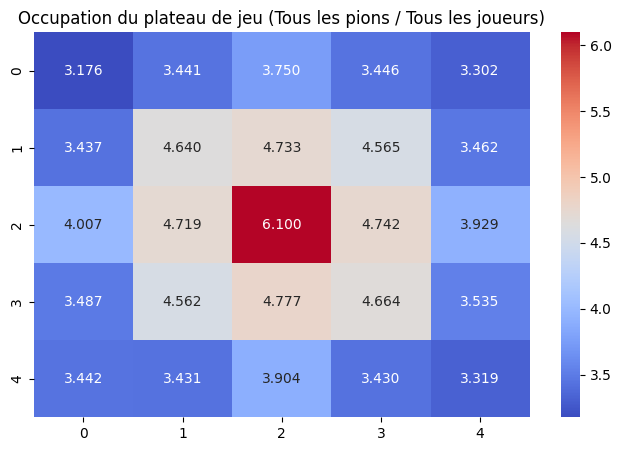


Pourcentage d'occupation du plateau de jeu sur un total de 27304 mouvements (Donkey):


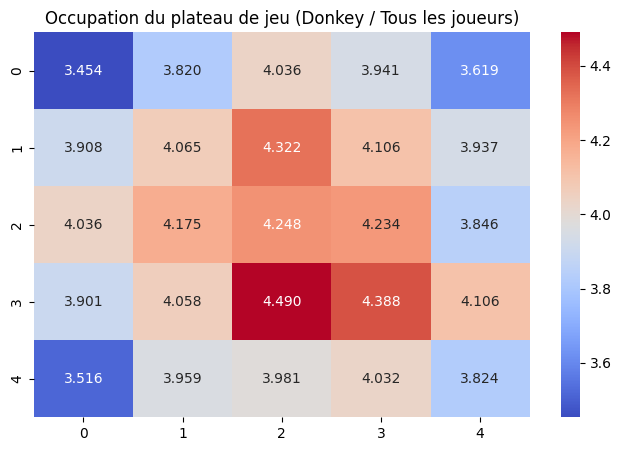


Pourcentage d'occupation du plateau de jeu sur un total de 13410 mouvements (Cat):


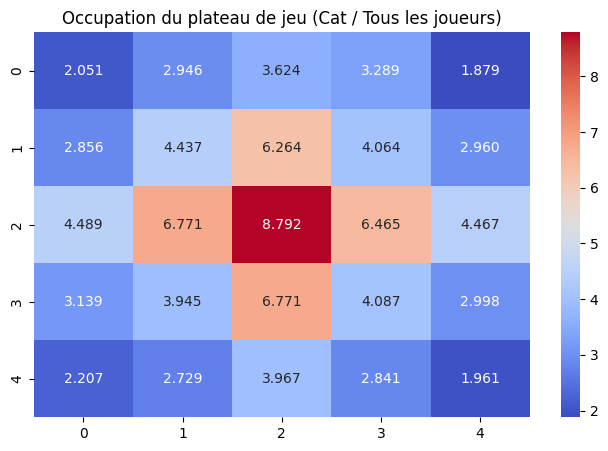


Pourcentage d'occupation du plateau de jeu sur un total de 13732 mouvements (Dog):


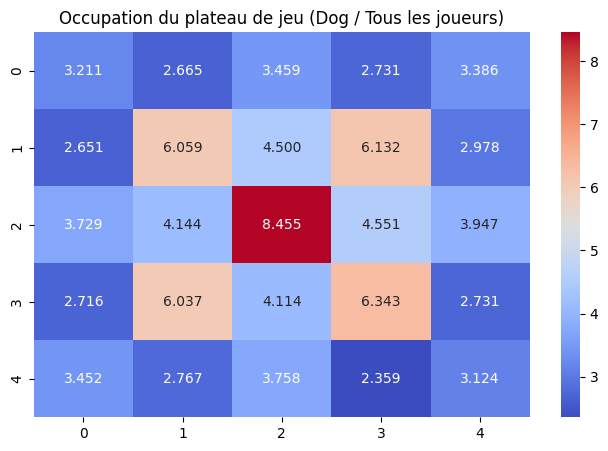


Pourcentage d'occupation du plateau de jeu sur un total de 29603 mouvements (Rooster):


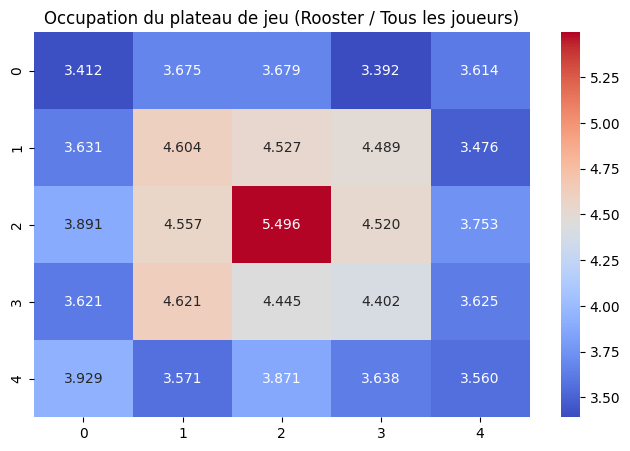

In [ ]:
# Affiche la proportion d'occupation de chaque case du plateau pour un type de pion donné et la couleur du pion
def plot_heatmap_occupation(_df,_type=None, color=None):
    df_occupation = get_grid_occupation(df, _type, color)
    num_mouvement = df_occupation.sum().sum()

    print(f"\nPourcentage d'occupation du plateau de jeu sur un total de {round(num_mouvement)} mouvements ({'Tous les pions' if _type is None else _type.capitalize()}):")

    plt.figure(figsize=(8, 5))
    sns.heatmap(df_occupation * 100 / num_mouvement, annot=True, fmt=".3f", cmap="coolwarm")
    plt.title(f"Occupation du plateau de jeu ({'Tous les pions' if _type is None else _type.capitalize()} / {'Tous les joueurs' if color is None else color})")
    plt.show()

# Joueur ayant le plus de victoire
plot_heatmap_occupation(df)
for pawn_type in ["donkey", "cat", "dog", "rooster"]:
    plot_heatmap_occupation(df, pawn_type)



Pourcentage d'occupation du plateau de jeu sur un total de 13618 mouvements (Donkey):


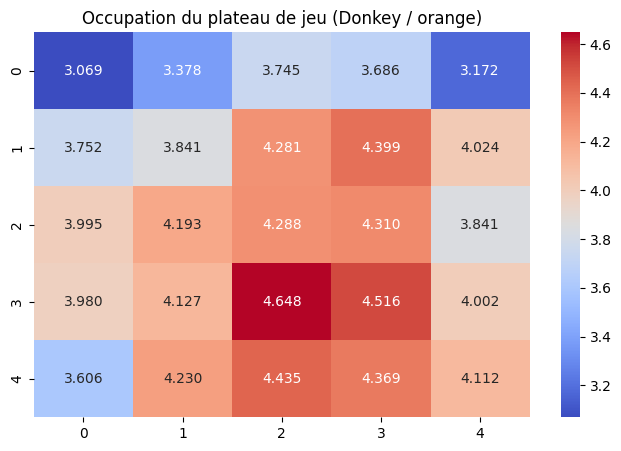


Pourcentage d'occupation du plateau de jeu sur un total de 6741 mouvements (Cat):


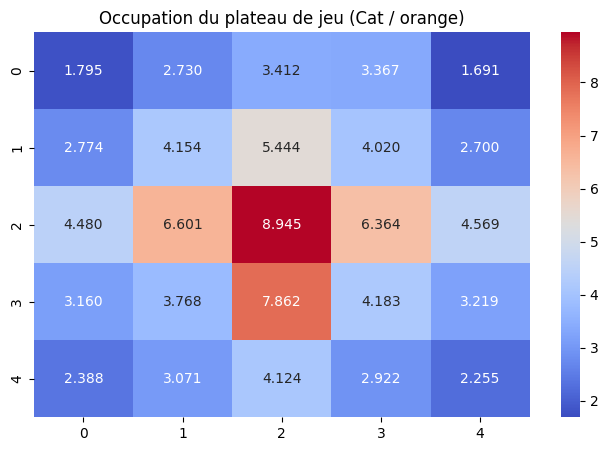


Pourcentage d'occupation du plateau de jeu sur un total de 6863 mouvements (Dog):


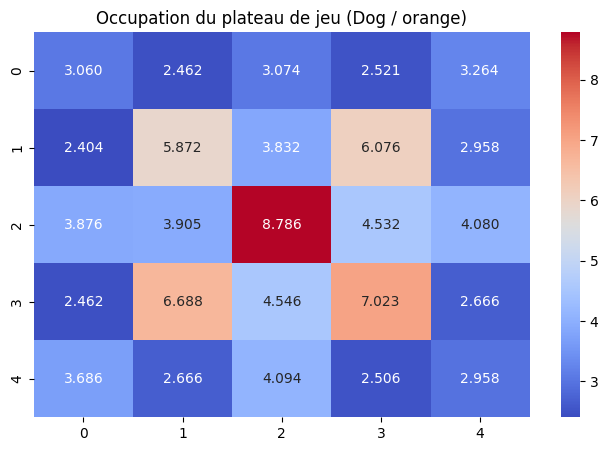


Pourcentage d'occupation du plateau de jeu sur un total de 14668 mouvements (Rooster):


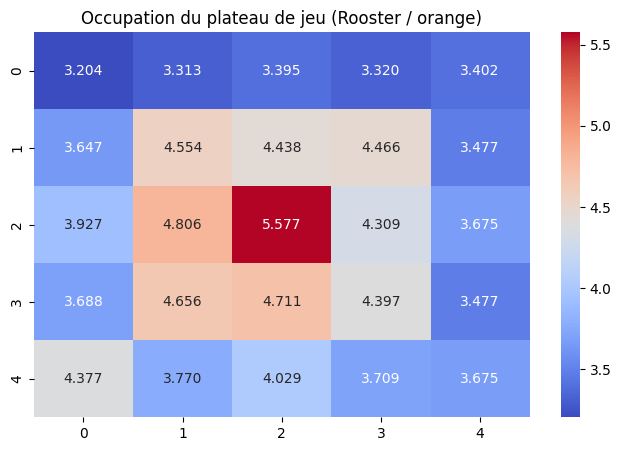

In [ ]:
# Le joueur ayant le plus de défaite
most_winner = df["victory"].value_counts().idxmax()
for pawn_type in ["donkey", "cat", "dog", "rooster"]:
    plot_heatmap_occupation(df, pawn_type, most_winner.lower())


Pourcentage d'occupation du plateau de jeu sur un total de 13686 mouvements (Donkey):


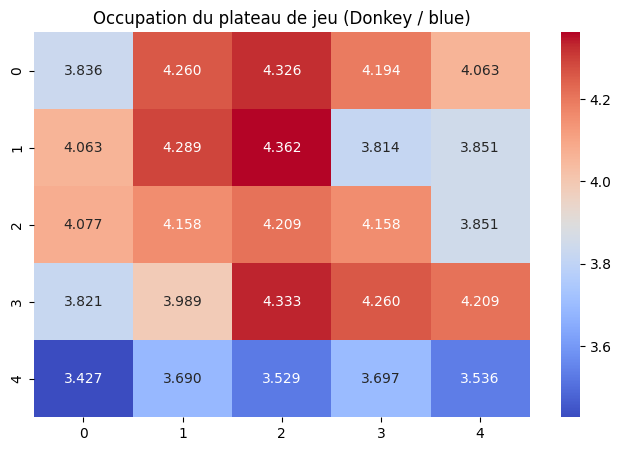


Pourcentage d'occupation du plateau de jeu sur un total de 6669 mouvements (Cat):


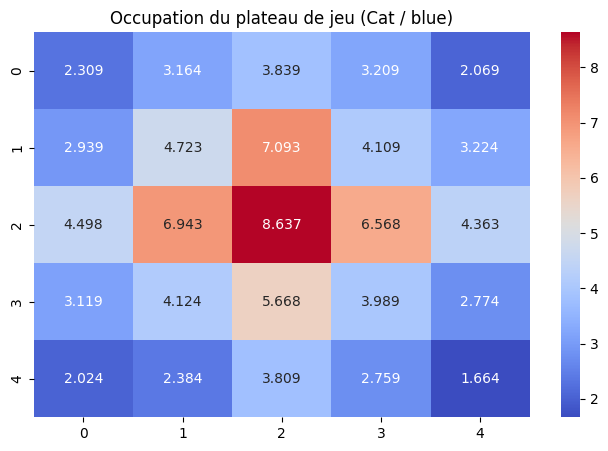


Pourcentage d'occupation du plateau de jeu sur un total de 6869 mouvements (Dog):


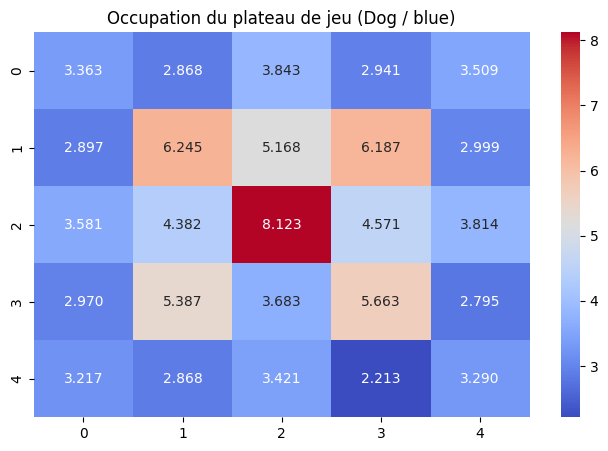


Pourcentage d'occupation du plateau de jeu sur un total de 14935 mouvements (Rooster):


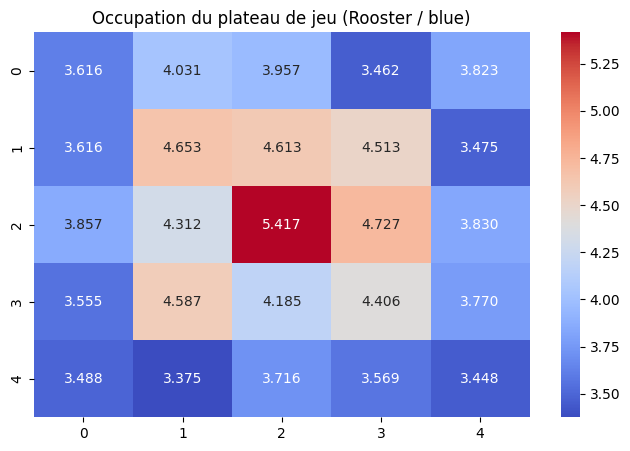

In [ ]:
most_winner = df["victory"].value_counts().idxmax()
for pawn_type in ["donkey", "cat", "dog", "rooster"]:
    plot_heatmap_occupation(df, pawn_type, "orange" if most_winner.lower() == "blue" else "blue")


Pourcentage d'occupation du plateau de jeu sur un total de 41890 mouvements (Tous les pions):


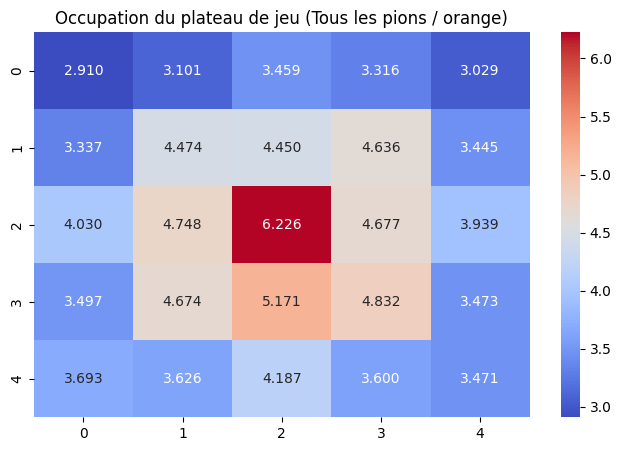


Pourcentage d'occupation du plateau de jeu sur un total de 42159 mouvements (Tous les pions):


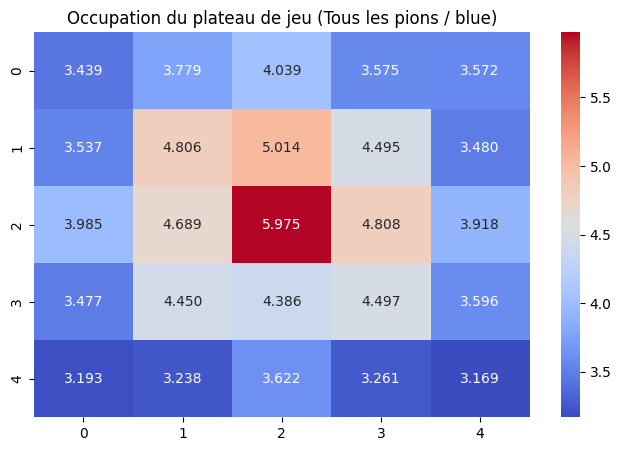

In [ ]:
sample = df.sample(10)
winner = sample["victory"].value_counts().idxmax()
looser = "orange" if winner.lower() == "blue" else "blue"

plot_heatmap_occupation(sample, color=winner.lower())
plot_heatmap_occupation(sample, color=looser)


174 mouvements par partie en moyenne
Le pion âne a effectué 27304 mouvements
Le pion chien a effectué 13732 mouvement
Le pion chat a effectué 13410 mouvements
Le pion coq a effectué 29603 mouvements


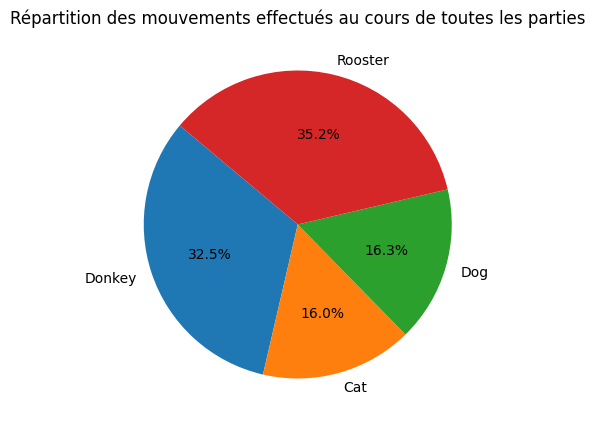

In [ ]:
def get_pawn_movement():
    mvt = {"donkey": 0, "cat": 0, "dog": 0, "rooster": 0}
    for _, row in df.iterrows():
        for element in mvt.keys():
            mvt[element] += len(row[element])
    return pd.Series(mvt)

# Series qui contient le nombre de mouvements de chaque pion au cours de toutes les parties
mvt = get_pawn_movement()

mvt_sum = mvt.sum()
mvt_donkey, mvt_cat, mvt_dog, mvt_rooster = mvt["donkey"], mvt["cat"], mvt["dog"], mvt["rooster"]
mvt_donkey_percent, mvt_cat_percent, mvt_dog_percent, mvt_rooster_percent = mvt_donkey / mvt_sum * 100, mvt_cat / mvt_sum * 100, mvt_dog / mvt_sum * 100, mvt_rooster / mvt_sum * 100

print(f"{round(mvt_sum / len(df))} mouvements par partie en moyenne")
print(f"Le pion âne a effectué {mvt_donkey} mouvements")
print(f"Le pion chien a effectué {mvt_dog} mouvement")
print(f"Le pion chat a effectué {mvt_cat} mouvements")
print(f"Le pion coq a effectué {mvt_rooster} mouvements")

# Pie chart du pourcentage de mouvement de chaque pièce au cours de toutes les parties
plt.figure(figsize=(10, 5))
plt.pie([mvt_donkey, mvt_cat, mvt_dog, mvt_rooster], labels=["Donkey", "Cat", "Dog", "Rooster"], autopct='%1.1f%%', startangle=140)
plt.title("Répartition des mouvements effectués au cours de toutes les parties")
plt.show()

La position de départ la plus avantageuse pour le donkey est (np.int64(4), np.int64(0)) score: 25.0
La position de départ la moins avantageuse pour le donkey est (np.int64(0), np.int64(3)) score: -27.0
Position: (np.int64(4), np.int64(0)), score: 25.0
Position: (np.int64(4), np.int64(2)), score: 24.0
Position: (np.int64(4), np.int64(4)), score: 17.0
Position: (np.int64(4), np.int64(3)), score: 9.0


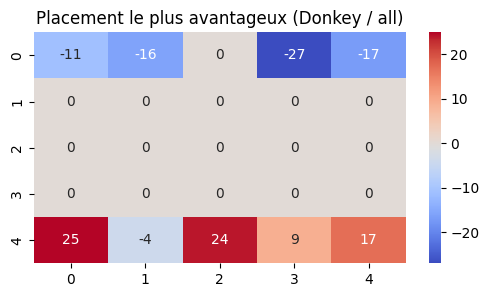

La position de départ la plus avantageuse pour le cat est (np.int64(4), np.int64(1)) score: 42.0
La position de départ la moins avantageuse pour le cat est (np.int64(0), np.int64(2)) score: -26.0
Position: (np.int64(4), np.int64(1)), score: 42.0
Position: (np.int64(4), np.int64(3)), score: 14.0
Position: (np.int64(4), np.int64(2)), score: 13.0
Position: (np.int64(4), np.int64(0)), score: 6.0


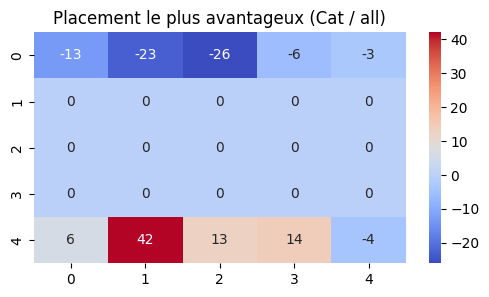

La position de départ la plus avantageuse pour le dog est (np.int64(4), np.int64(3)) score: 29.0
La position de départ la moins avantageuse pour le dog est (np.int64(0), np.int64(1)) score: -26.0
Position: (np.int64(4), np.int64(3)), score: 29.0
Position: (np.int64(4), np.int64(4)), score: 22.0
Position: (np.int64(4), np.int64(1)), score: 11.0
Position: (np.int64(4), np.int64(2)), score: 8.0


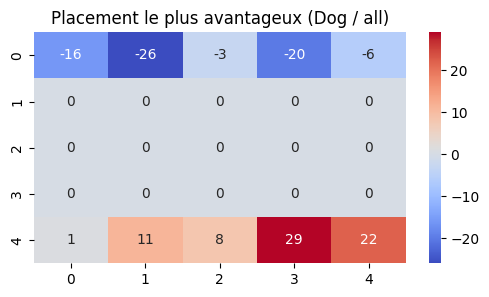

La position de départ la plus avantageuse pour le rooster est (np.int64(4), np.int64(0)) score: 23.0
La position de départ la moins avantageuse pour le rooster est (np.int64(0), np.int64(4)) score: -26.0
Position: (np.int64(4), np.int64(0)), score: 23.0
Position: (np.int64(4), np.int64(2)), score: 15.0
Position: (np.int64(4), np.int64(4)), score: 14.0
Position: (np.int64(4), np.int64(3)), score: 12.0
Position: (np.int64(4), np.int64(1)), score: 7.0


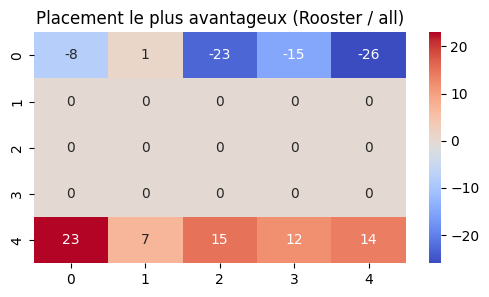

In [ ]:
from data_manager import PawnType

# Retourne une Series qui contient le nombre de fois où chaque pion a été placé en position de départ et le joueur est sorti vainqueur
# Stratégie : On incrémente de 1 si le pion est placé en position de départ et le joueur est sorti vainqueur, sinon on décrémente de 1 la position
def get_initial_pos(_type, color):
    grid = np.zeros((5, 5))
    for _, row in df.iterrows():
        winner = row["victory"]
        for pawn in row["initial_pos"]:
            if color == pawn["color"] or color == "all":
                if pawn["type"] == PawnType[_type.upper()].value:
                    grid[pawn["pos"][1]][pawn["pos"][0]] += 1 if pawn["color"].lower() == winner.lower() else -1
    return grid

def plot_placement_heatmap(_type, color):
    grid = get_initial_pos(_type, color)

    # get the pos that has the most win
    max_pos = np.unravel_index(np.argmax(grid, axis=None), grid.shape)
    # get the pos that has the most lose
    min_pos = np.unravel_index(np.argmin(grid, axis=None), grid.shape)
    print(f"La position de départ la plus avantageuse pour le {_type} est {max_pos} score: {grid[max_pos]}")
    print(f"La position de départ la moins avantageuse pour le {_type} est {min_pos} score: {grid[min_pos]}")
    
    # from the grid, give in descending order the best position to start
    for i in np.argsort(grid, axis=None)[::-1]:
        pos = np.unravel_index(i, grid.shape)
        if grid[pos] > 1:
            print(f"Position: {pos}, score: {grid[pos]}")
        if grid[pos] == 0:
            break
    
    plt.figure(figsize=(6, 3))
    sns.heatmap(grid, annot=True, cmap="coolwarm")
    plt.title(f"Placement le plus avantageux ({_type.capitalize()} / {'Tous les joueurs' if _type == 'all' else color})")
    plt.show()

for pawn_type in ["donkey", "cat", "dog", "rooster"]:
    plot_placement_heatmap(pawn_type, "all")

La position de départ la plus avantageuse pour le donkey est (np.int64(0), np.int64(2)) score: 0.0
La position de départ la moins avantageuse pour le donkey est (np.int64(0), np.int64(3)) score: -27.0


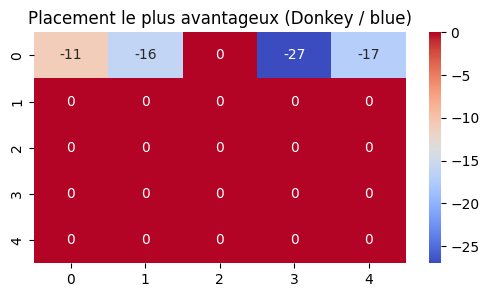

La position de départ la plus avantageuse pour le cat est (np.int64(1), np.int64(0)) score: 0.0
La position de départ la moins avantageuse pour le cat est (np.int64(0), np.int64(2)) score: -26.0


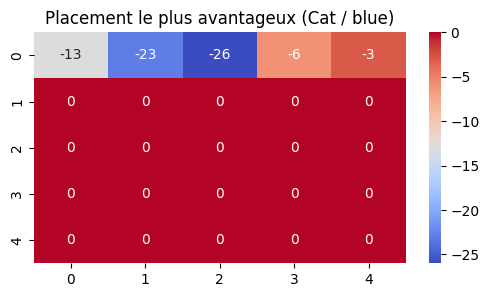

La position de départ la plus avantageuse pour le dog est (np.int64(1), np.int64(0)) score: 0.0
La position de départ la moins avantageuse pour le dog est (np.int64(0), np.int64(1)) score: -26.0


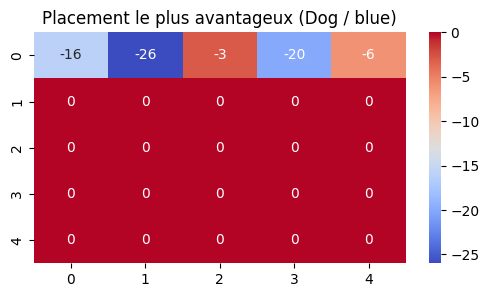

La position de départ la plus avantageuse pour le rooster est (np.int64(0), np.int64(1)) score: 1.0
La position de départ la moins avantageuse pour le rooster est (np.int64(0), np.int64(4)) score: -26.0


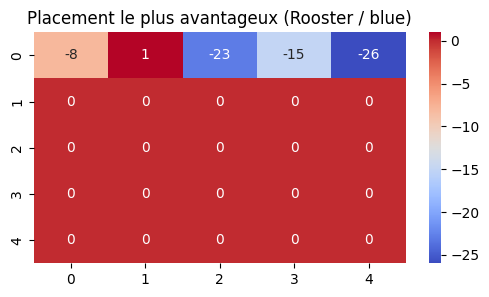

In [ ]:
for pawn_type in ["donkey", "cat", "dog", "rooster"]:
    plot_placement_heatmap(pawn_type, "orange" if most_winner.lower() == "blue" else "blue")